# Data Exploration

We will conduct exploratory data analysis (EDA) to understand the dataset's structure, identify missing values, and visualize relationships between features. This will help us determine the most relevant features for our regression model.

## Dataset Features

We will use the [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) dataset from Kaggle, which contains 11 clinical features for predicting stroke events.

The features are as follows:

1. **Gender** – Categorical variable indicating the patient's gender: `"Male"`, `"Female"`, or `"Other"`.
2. **Age** – Numeric value representing the patient's age in years.
3. **Hypertension** – Binary variable: `1` if the patient has been diagnosed with hypertension, `0` otherwise.
4. **Heart Disease** – Binary variable: `1` if the patient has a heart condition, `0` if no heart disease is present.
5. **Marital Status** – Categorical variable indicating if the patient has ever been married: `"Yes"` or `"No"`.
6. **Work Type** – Categorical variable describing the type of employment: `"children"`, `"Govt_job"`, `"Never_worked"`, `"Private"`, or `"Self-employed"`.
7. **Residence Type** – Categorical variable indicating the patient's living area: `"Urban"` or `"Rural"`.
8. **Average Glucose Level** – Numeric value representing the average blood glucose concentration (in mg/dL).
9. **BMI** – Body Mass Index, a numeric value indicating the patient's body fat based on height and weight.
10. **Smoking Status** – Categorical variable indicating smoking habits: `"formerly smoked"`, `"never smoked"`, `"smokes"`, or `"Unknown"`\*.
11. **Stroke History** – Binary variable: `1` if the patient has experienced a stroke, `0` otherwise.


## Explore Dataset

Load the dataset.


In [18]:
import pandas as pd

from stroke_prediction.config import RAW_DATA_DIR

data = pd.read_csv(RAW_DATA_DIR / "healthcare-dataset-stroke-data.csv")

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Analyze the dataset metadata.


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the summary, we can see that the dataset contains 5,110 entries. Some features contain missing values, particularly the `bmi` column. The `stroke` column is the target variable, indicating whether a stroke has occurred.


We will drop the `id` column as it is not relevant for our analysis. The `stroke` column will be our target variable, and we will focus on the other features for regression analysis.


In [20]:
data = data.drop(columns=["id"])

Next we will correct the data types first.


In [30]:
data["hypertension"] = data["hypertension"].astype("bool")
data["heart_disease"] = data["heart_disease"].astype("bool")
data["stroke"] = data["stroke"].astype("bool")
data["ever_married"] = data["ever_married"].map({"Yes": True, "No": False})

### Check Numerical Features Summary


In [31]:
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [23]:
numberic_columns = data.select_dtypes(include=["number"]).columns

In [40]:
numberic_columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

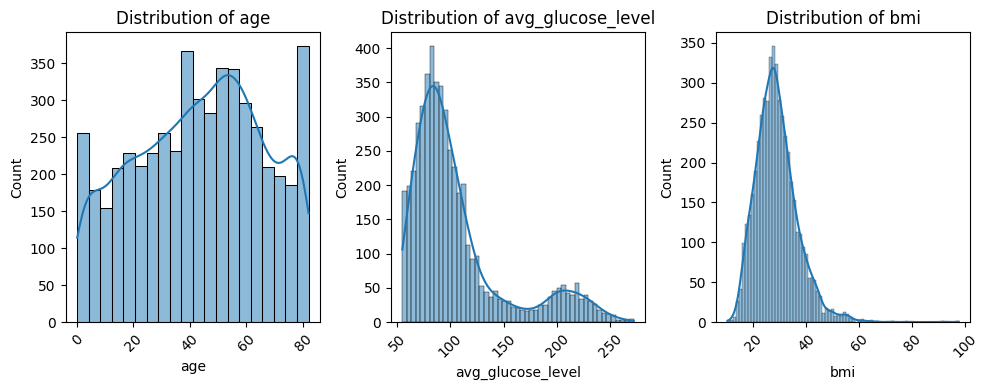

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

for i, col in enumerate(numberic_columns):
    ax = axes[i]
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

For numerical features, the `bmi` column has missing values and skewed distributions. We will handle missing values and consider transformations if necessary.
And for the `avg_glucose_level` column, we will also deal with it non-normal distribution.


### Check Categorical Features Summary


In [32]:
data.describe(include=["object", "bool"]).T

,count,unique,top,freq
gender,5110,3,Female,2994
hypertension,5110,2,False,4612
heart_disease,5110,2,False,4834
ever_married,5110,2,True,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892
stroke,5110,2,False,4861


In [26]:
categorical_columns = data.select_dtypes(include=["object", "bool"]).columns

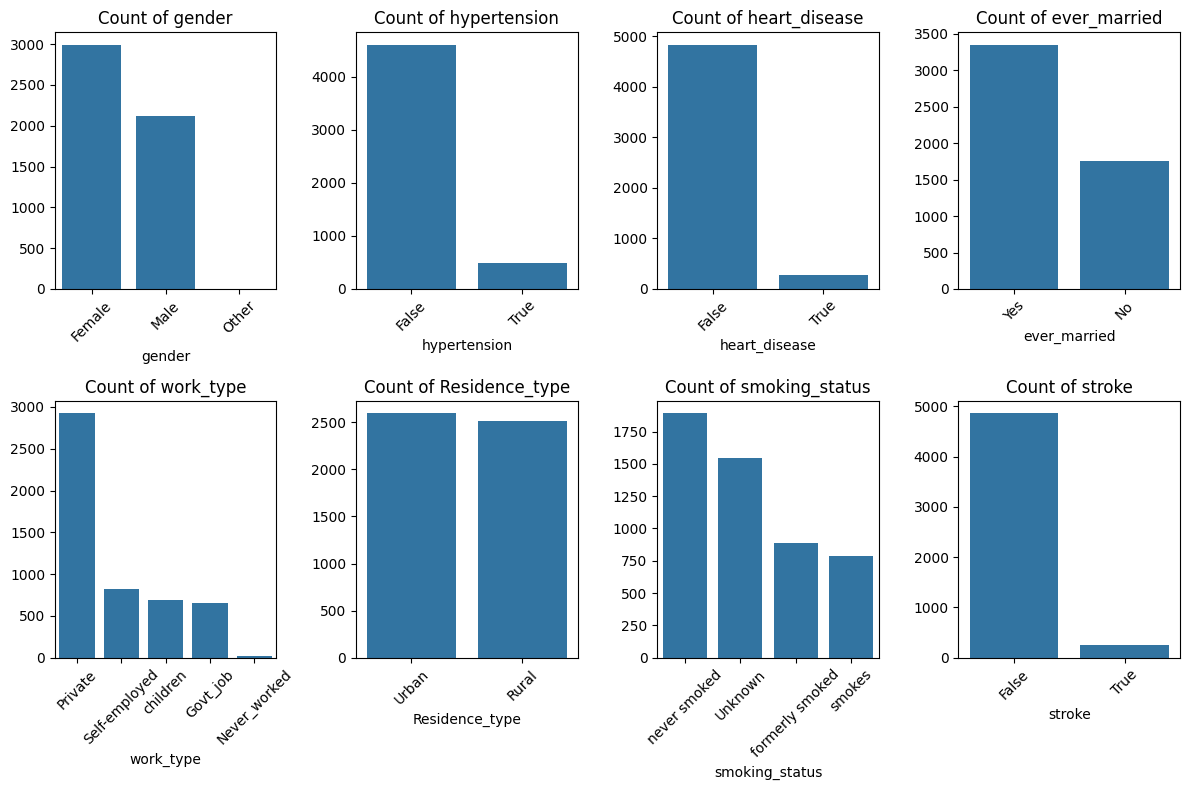

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))

for i, col in enumerate(categorical_columns):
    ax = axes[i // 4, i % 4]

    plot_data = data[col].value_counts()
    sns.barplot(x=plot_data.index, y=plot_data.values, ax=ax)

    ax.set_title(f"Count of {col}")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

For categorical features, we find that the target variable `stroke` is imbalanced, with a significantly higher number of non-stroke cases compared to stroke cases. We will need to address this imbalance in our model training. Many other features also imbalanced, such as `gender`, `hypertension`, and `heart_disease`. We will need to consider how to handle these imbalances in our analysis and modeling.

### Check feature correlations
We can use the [dython](https://pypi.org/project/dython/) package to visualize feature correlations for both numerical and categorical features.

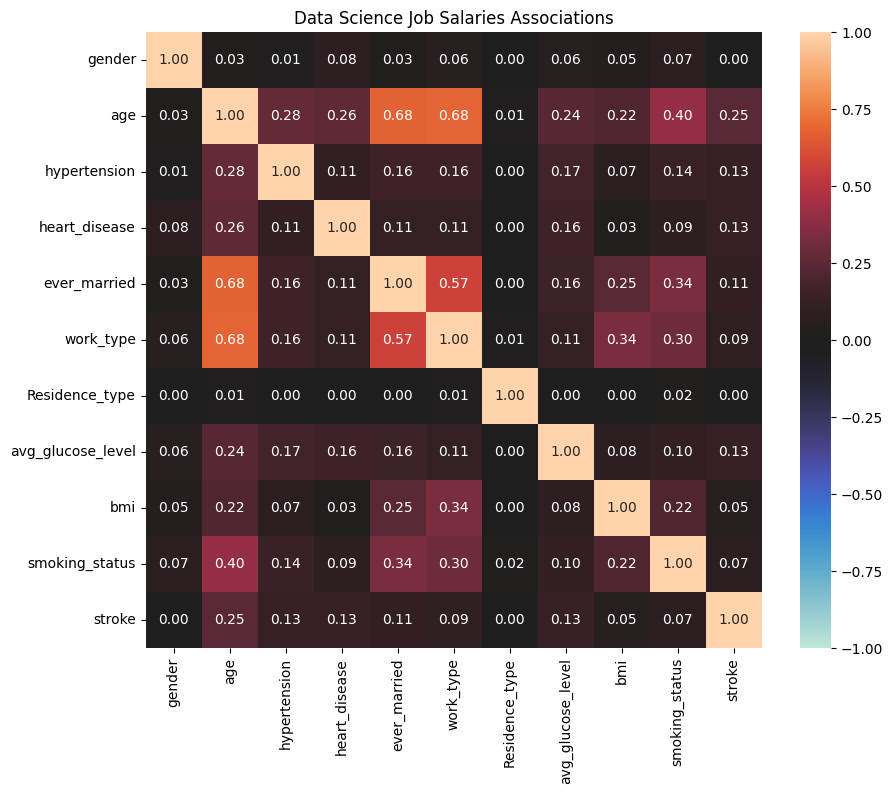

In [38]:
from dython.nominal import associations

associations(
    data,
    figsize=(10, 8),
    title="Data Science Job Salaries Associations",
    nominal_columns=list(categorical_columns),
    numerical_columns=list(numberic_columns),
);

From the correlation matrix, `gender`, `Residence_type` do not have a correlation with the target variable `stroke`. The highest correlation with the target variable is `age`.

# Key Findings

- The dataset contains 5,110 entries with various clinical features.
- The `bmi` and `avg_glucose_level` columns have missing values and non-normal distributions.
- The target variable `stroke` is imbalanced, with significantly more non-stroke cases.
- Many categorical features are also imbalanced, such as `gender`, `hypertension`, and `heart_disease`.
- The highest correlation with the target variable is `age`, while `gender` and `Residence_type` show no correlation.